In [43]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
!pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI
from nltk import FreqDist
nltk.download('punkt')
nltk.download('tagsets')
nltk.help.upenn_tagset()
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer

import random

import pickle #install

import pandas as pd

from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn import metrics

from statistics import mode #install

import json

import csv

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

from os import path

from PIL import Image

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from xgboost import XGBClassifier

#from tabulate import tabulate

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\edwardsrk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\edwardsrk\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [44]:
df1 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0314_1.csv')
df2 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0314_2.csv')
df3 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0314_3.csv')
df4 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0314_4.csv')
df5 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0314_5.csv')

df6 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0315_1.csv')
df7 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0315_2.csv')
df8 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0315_3.csv')
df9 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0315_4.csv')
df10 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0315_5.csv')

df11 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0316_1.csv')
df12 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0316_2.csv')
df13 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0316_3.csv')
df14 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0316_4.csv')
df15 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0316_5.csv')

df16 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0317_1.csv')
df17 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0317_2.csv')
df18 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0317_3.csv')
df19 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0317_4.csv')
df20 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0317_5.csv')

df21 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0318_1.csv')
df22 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0318_2.csv')
df23 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0318_3.csv')
df24 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0318_4.csv')
df25 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0318_5.csv')

df26 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0319_1.csv')
df27 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0319_2.csv')
df28 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0319_3.csv')
df29 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0319_4.csv')
df30 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0319_5.csv')

df31 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0320_1.csv')
df32 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0320_2.csv')
df33 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0320_3.csv')
df34 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0320_4.csv')
df35 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0320_5.csv')

df36 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0321_1.csv')
df37 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0321_2.csv')
df38 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0321_3.csv')
df39 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0321_4.csv')
df40 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0321_5.csv')
#10 data sets of variable size
#will have to grab rest of data later

In [45]:
dfs_to_concat= [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18
               ,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31,df32,df33,df34
               ,df35,df36,df37,df38,df39,df40]
#list of all datasets

In [46]:
df1.username.nunique()

271

In [47]:
df2.shape, df3.shape

((10, 12), (1000, 12))

In [48]:
df = pd.concat(dfs_to_concat)
#combine all ten datasets into one dataframe

In [49]:
df.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,3/14/2020 23:55,AlbertoxVazquez,NaN,0,1,5,Bout to depression buy these OnlyFans while I’...,NaN,NaN,NaN,1.238980e+18,https://twitter.com/AlbertoxVazquez/status/123...
1,3/14/2020 23:54,TheOGKennedy,NaN,6,2,63,Pretty lucky for me how we ended up in the onl...,NaN,NaN,NaN,1.238980e+18,https://twitter.com/TheOGKennedy/status/123897...
2,3/14/2020 23:45,megmarie5,NaN,0,0,0,@ariana2525 I myself suffered & still suffer. ...,NaN,@ariana2525,NaN,1.238970e+18,https://twitter.com/megmarie5/status/123897468...
3,3/14/2020 23:43,BoozyBillsBabe,NaN,13,0,39,Second full day of self-quarantine and I am ju...,NaN,NaN,NaN,1.238970e+18,https://twitter.com/BoozyBillsBabe/status/1238...
4,3/14/2020 23:42,megmarie5,NaN,0,0,1,I’m behind on @VanderpumpRules and binge watch...,NaN,@VanderpumpRules @ariana2525,NaN,1.238970e+18,https://twitter.com/megmarie5/status/123897385...


In [50]:
df.shape

(15339, 12)

In [51]:
df = df.drop(['geo', 'to', 'permalink'], axis = 1)
#dropping columns I don't want/mostly empty

In [52]:
df.head()

,date,username,replies,retweets,favorites,text,mentions,hashtags,id
0,3/14/2020 23:55,AlbertoxVazquez,0,1,5,Bout to depression buy these OnlyFans while I’...,NaN,NaN,1.238980e+18
1,3/14/2020 23:54,TheOGKennedy,6,2,63,Pretty lucky for me how we ended up in the onl...,NaN,NaN,1.238980e+18
2,3/14/2020 23:45,megmarie5,0,0,0,@ariana2525 I myself suffered & still suffer. ...,@ariana2525,NaN,1.238970e+18
3,3/14/2020 23:43,BoozyBillsBabe,13,0,39,Second full day of self-quarantine and I am ju...,NaN,NaN,1.238970e+18
4,3/14/2020 23:42,megmarie5,0,0,1,I’m behind on @VanderpumpRules and binge watch...,@VanderpumpRules @ariana2525,NaN,1.238970e+18


In [53]:
df.isnull().sum(axis = 0)
# looks like more than half of mentions and hashtags are null

date             0
username         0
replies          0
retweets         0
favorites        0
text             3
mentions     13877
hashtags     13155
id               0
dtype: int64

In [54]:
df.username.nunique()
#there are some user names that are repeated
#find them?

12174

In [55]:
usr_count = df.username.value_counts()
#user names with the amount of tweets they tweet

In [56]:
counts = usr_count.tolist()
#counts
# a list of all the counts of all the tweets per person

In [57]:
counts_of_tweets = Counter(counts)
# a count of how many people have multiple tweets

x = list(counts_of_tweets.keys())
#amout of tweet
y = list(counts_of_tweets.values())
#amount of people
type(x)
x, y

([142, 20, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
 [1, 1, 1, 1, 3, 2, 5, 3, 6, 15, 34, 46, 106, 308, 1438, 10204])

In [58]:
users = usr_count.index.tolist()
#users
#list of unique users

x

[142, 20, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

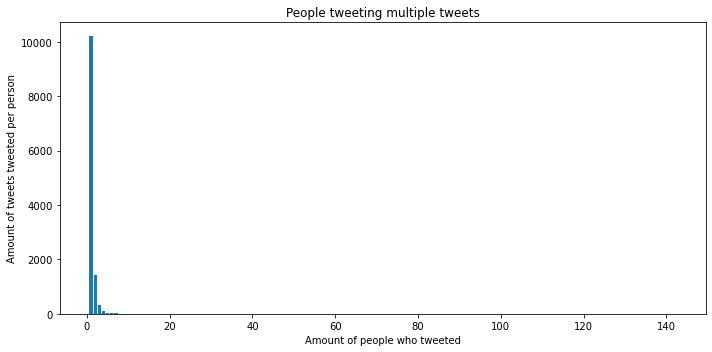

In [59]:
#x = np.arange(len(x))/
width = 0.35  # the width of the bars

fig = plt.figure(figsize = (10, 5))
plt.bar(x, y)
#plt.set_xtickslabels(x)
plt.xlabel("Amount of people who tweeted")
plt.ylabel("Amount of tweets tweeted per person")
plt.title("People tweeting multiple tweets")
plt.tight_layout()
#plt.set_xticks(x)
plt.show();

In [60]:
df.head()

,date,username,replies,retweets,favorites,text,mentions,hashtags,id
0,3/14/2020 23:55,AlbertoxVazquez,0,1,5,Bout to depression buy these OnlyFans while I’...,NaN,NaN,1.238980e+18
1,3/14/2020 23:54,TheOGKennedy,6,2,63,Pretty lucky for me how we ended up in the onl...,NaN,NaN,1.238980e+18
2,3/14/2020 23:45,megmarie5,0,0,0,@ariana2525 I myself suffered & still suffer. ...,@ariana2525,NaN,1.238970e+18
3,3/14/2020 23:43,BoozyBillsBabe,13,0,39,Second full day of self-quarantine and I am ju...,NaN,NaN,1.238970e+18
4,3/14/2020 23:42,megmarie5,0,0,1,I’m behind on @VanderpumpRules and binge watch...,@VanderpumpRules @ariana2525,NaN,1.238970e+18


In [61]:
top_retweets = df.sort_values(by = ['retweets'],ascending= False, axis = 0)
#df of retweets with index with most retweets first
top_retweets.head(10).index.tolist()
#index of top retweeted tweets
top_retweets.head(50)

,date,username,replies,retweets,favorites,text,mentions,hashtags,id
169,2020-03-28 20:07:18,sergistack,192,478,1084,¿USAS GOOGLE CHROME? Lo siento por las mayúscu...,NaN,NaN,1.243993e+18
1,2020-03-28 20:07:18,sergistack,192,478,1084,¿USAS GOOGLE CHROME? Lo siento por las mayúscu...,NaN,NaN,1.243993e+18
253,2020-03-28 20:07:18,sergistack,192,478,1084,¿USAS GOOGLE CHROME? Lo siento por las mayúscu...,NaN,NaN,1.243993e+18
22,2020-03-28 20:07:18,sergistack,192,478,1084,¿USAS GOOGLE CHROME? Lo siento por las mayúscu...,NaN,NaN,1.243993e+18
1,2020-03-28 20:07:18,sergistack,192,478,1084,¿USAS GOOGLE CHROME? Lo siento por las mayúscu...,NaN,NaN,1.243993e+18
274,2020-03-28 20:07:18,sergistack,192,478,1084,¿USAS GOOGLE CHROME? Lo siento por las mayúscu...,NaN,NaN,1.243993e+18
64,2020-03-28 20:07:18,sergistack,192,478,1084,¿USAS GOOGLE CHROME? Lo siento por las mayúscu...,NaN,NaN,1.243993e+18
295,2020-03-28 20:07:18,sergistack,192,478,1084,¿USAS GOOGLE CHROME? Lo siento por las mayúscu...,NaN,NaN,1.243993e+18
211,2020-03-28 20:07:18,sergistack,192,478,1084,¿USAS GOOGLE CHROME? Lo siento por las mayúscu...,NaN,NaN,1.243993e+18
316,2020-03-28 20:07:18,sergistack,192,478,1084,¿USAS GOOGLE CHROME? Lo siento por las mayúscu...,NaN,NaN,1.243993e+18


In [62]:
top_retweets.iloc[1]
#has 33 posts, all spam, maybe get rid of?

date                                       2020-03-28 20:07:18
username                                            sergistack
replies                                                    192
retweets                                                   478
favorites                                                 1084
text         ¿USAS GOOGLE CHROME? Lo siento por las mayúscu...
mentions                                                   NaN
hashtags                                                   NaN
id                                                 1.24399e+18
Name: 1, dtype: object

In [63]:
tag_list= set(list(df.hashtags.tolist()))

In [64]:
len(tag_list)

1681

Below does not work, get rid

In [65]:
tag_list_dupes =(df.hashtags.tolist())
nan = float('nan')
type(nan), type(tag_list_dupes[0]),tag_list_dupes[0] == nan, tag_list_dupes[0], nan
print( np.isnan(int(6)))
#nans are dumb

False


In [66]:
tag_list_nonan = [tag for tag in tag_list_dupes if type(tag) == str]
#all nans are floats, filtering out all the floats instead of all nans

In [67]:
len(tag_list_nonan)

2184

In [68]:
df_nonan = df.hashtags.dropna()
#df[df['hashtags'].str.contains('covid')]

In [69]:
df_nonan.columns

AttributeError: 'Series' object has no attribute 'columns'

End of delete block

In [70]:
df_nonan

16    #iamsoblessed #tpforsale #yoga #meditation #it...
17    #iamsoblessed #tpforsale #yoga #meditation #it...
24                                          #BITCHCRAFT
36    #depression #blacktwitterlive #COVID19 #Scopat...
41                                     #KeepAStrongMind
                            ...                        
19                                             #bipolar
20                                             #CashApp
21                                #COVIDー19 #Trumpdemic
28    #mentalhealth #depression #anxiety #bipolar #p...
30    #createhope #createyourself #morningmotivation...
Name: hashtags, Length: 2184, dtype: object

In [71]:
covid = (df_nonan[df_nonan.str.contains('covid')])
Covid = (df_nonan[df_nonan.str.contains('Covid')])
COVID = (df_nonan[df_nonan.str.contains('COVID')])
rona = (df_nonan[df_nonan.str.contains('rona')])
depression = (df_nonan[df_nonan.str.contains('depression')])
anxiety = (df_nonan[df_nonan.str.contains('anxiety')])
RONA = (df_nonan[df_nonan.str.contains('RONA')])
mental = (df_nonan[df_nonan.str.contains('mental')])
mix=(df_nonan[df_nonan.str.contains('COVID', 'rona')])
ac = (df_nonan[df_nonan.str.contains('')])

#dataframes keeping track of string matches

In [72]:
len(covid), len(Covid), len(COVID), len(rona), len(RONA), len(depression), len(anxiety), len(mental), len(mix)
#len(ac)
len(depression), len(anxiety)

(174, 339)

In [73]:
ac

16    #iamsoblessed #tpforsale #yoga #meditation #it...
17    #iamsoblessed #tpforsale #yoga #meditation #it...
24                                          #BITCHCRAFT
36    #depression #blacktwitterlive #COVID19 #Scopat...
41                                     #KeepAStrongMind
                            ...                        
19                                             #bipolar
20                                             #CashApp
21                                #COVIDー19 #Trumpdemic
28    #mentalhealth #depression #anxiety #bipolar #p...
30    #createhope #createyourself #morningmotivation...
Name: hashtags, Length: 2184, dtype: object

In [74]:
COVID

36     #depression #blacktwitterlive #COVID19 #Scopat...
43                                             #COVIDー19
149    #sayitsatursay #mentalhealth #mentalillness #C...
151                     #coronanxiety #COVID #depression
163                        #MentalHealthMatters #COVID19
                             ...                        
236                                             #COVID19
238             #COVID19 #nurses #unknown #stayathomemom
299    #MentalHealth #Alone #SuicidePrevention #COVID...
339       #pandemic #armed #anxious #quarantining #COVID
21                                 #COVIDー19 #Trumpdemic
Name: hashtags, Length: 380, dtype: object

In [75]:
unsplit = df_nonan.tolist()
#list where all hashtags per tweet are one string

In [76]:
unsplit

['#iamsoblessed #tpforsale #yoga #meditation #ithinkstupidthingsrfunny',
 '#iamsoblessed #tpforsale #yoga #meditation #ithinkstupidthingsrfunny',
 '#BITCHCRAFT',
 '#depression #blacktwitterlive #COVID19 #Scopatumanaa',
 '#KeepAStrongMind',
 '#COVIDー19',
 '#toiletpapercrisis #coronapocalypsepic',
 '#Depression',
 '#MentalHealthMatters #MentalHealthAwareness #depression #bipolar',
 '#VISION',
 '#PTSD #ANXIETY #DEPRESSION #OCD #EATINGDISORDER',
 '#bellasantecbd #buylocal #depressionhelp #depression #anxietyrelief #cbdheals #allnatural #cbddrops #watersoluablecbdpic',
 '#faithinAmerica',
 '#CoronavirusPandemic',
 '#sayitsatursay #mentalhealth #mentalillness #COVIDー19pic',
 '#chronicillnesses #LoverFest',
 '#coronanxiety #COVID #depression',
 '#Anxiety #depression #OCD',
 '#MentalHealthMatters #COVID19',
 '#OneStepCloserToWonho #WonhoIsAlmostHome',
 '#rvgiveaway #campingworld #getusouttahere #holymosquitos',
 '#coronapocalypse #CoronaOutbreak #coronavirus',
 '#coronavirus #QuarantineAndChil

In [77]:
split = [ob.split(' ') for ob in unsplit ]
#list of lists of all hashtags per tweet

In [78]:
split

[['#iamsoblessed',
  '#tpforsale',
  '#yoga',
  '#meditation',
  '#ithinkstupidthingsrfunny'],
 ['#iamsoblessed',
  '#tpforsale',
  '#yoga',
  '#meditation',
  '#ithinkstupidthingsrfunny'],
 ['#BITCHCRAFT'],
 ['#depression', '#blacktwitterlive', '#COVID19', '#Scopatumanaa'],
 ['#KeepAStrongMind'],
 ['#COVIDー19'],
 ['#toiletpapercrisis', '#coronapocalypsepic'],
 ['#Depression'],
 ['#MentalHealthMatters', '#MentalHealthAwareness', '#depression', '#bipolar'],
 ['#VISION'],
 ['#PTSD', '#ANXIETY', '#DEPRESSION', '#OCD', '#EATINGDISORDER'],
 ['#bellasantecbd',
  '#buylocal',
  '#depressionhelp',
  '#depression',
  '#anxietyrelief',
  '#cbdheals',
  '#allnatural',
  '#cbddrops',
  '#watersoluablecbdpic'],
 ['#faithinAmerica'],
 ['#CoronavirusPandemic'],
 ['#sayitsatursay', '#mentalhealth', '#mentalillness', '#COVIDー19pic'],
 ['#chronicillnesses', '#LoverFest'],
 ['#coronanxiety', '#COVID', '#depression'],
 ['#Anxiety', '#depression', '#OCD'],
 ['#MentalHealthMatters', '#COVID19'],
 ['#OneStep

In [79]:
flat_combo = [word for word_list in split for word in word_list]
#flat list of all hashtags

In [80]:
flat_combo

['#iamsoblessed',
 '#tpforsale',
 '#yoga',
 '#meditation',
 '#ithinkstupidthingsrfunny',
 '#iamsoblessed',
 '#tpforsale',
 '#yoga',
 '#meditation',
 '#ithinkstupidthingsrfunny',
 '#BITCHCRAFT',
 '#depression',
 '#blacktwitterlive',
 '#COVID19',
 '#Scopatumanaa',
 '#KeepAStrongMind',
 '#COVIDー19',
 '#toiletpapercrisis',
 '#coronapocalypsepic',
 '#Depression',
 '#MentalHealthMatters',
 '#MentalHealthAwareness',
 '#depression',
 '#bipolar',
 '#VISION',
 '#PTSD',
 '#ANXIETY',
 '#DEPRESSION',
 '#OCD',
 '#EATINGDISORDER',
 '#bellasantecbd',
 '#buylocal',
 '#depressionhelp',
 '#depression',
 '#anxietyrelief',
 '#cbdheals',
 '#allnatural',
 '#cbddrops',
 '#watersoluablecbdpic',
 '#faithinAmerica',
 '#CoronavirusPandemic',
 '#sayitsatursay',
 '#mentalhealth',
 '#mentalillness',
 '#COVIDー19pic',
 '#chronicillnesses',
 '#LoverFest',
 '#coronanxiety',
 '#COVID',
 '#depression',
 '#Anxiety',
 '#depression',
 '#OCD',
 '#MentalHealthMatters',
 '#COVID19',
 '#OneStepCloserToWonho',
 '#WonhoIsAlmostHom

In [81]:
flat_string = " ".join(tag for tag in flat_combo)
#all hashtags to one string

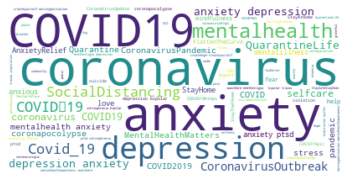

In [82]:
wordcloud = WordCloud(background_color="white").generate(flat_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

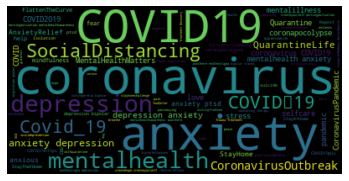

In [83]:
wordcloud = WordCloud(background_color="black").generate(flat_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\edwardsrk\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edwardsrk\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


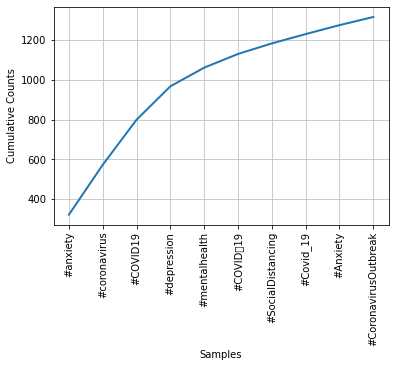

In [84]:
freq = FreqDist(flat_combo)
freq.plot(10, cumulative=True);

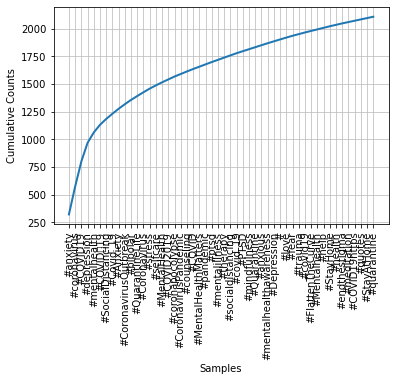

In [85]:
freq2 = FreqDist(flat_combo)
freq2.plot(50, cumulative=True);

In [86]:
len(freq.hapaxes()), len(freq)

(2309, 2938)

In [87]:
count_of_tags = Counter(flat_combo)
count_of_tags

Counter({'#iamsoblessed': 4,
         '#tpforsale': 4,
         '#yoga': 6,
         '#meditation': 12,
         '#ithinkstupidthingsrfunny': 4,
         '#BITCHCRAFT': 1,
         '#depression': 168,
         '#blacktwitterlive': 1,
         '#COVID19': 227,
         '#Scopatumanaa': 1,
         '#KeepAStrongMind': 1,
         '#COVIDー19': 69,
         '#toiletpapercrisis': 1,
         '#coronapocalypsepic': 1,
         '#Depression': 17,
         '#MentalHealthMatters': 21,
         '#MentalHealthAwareness': 7,
         '#bipolar': 39,
         '#VISION': 1,
         '#PTSD': 18,
         '#ANXIETY': 4,
         '#DEPRESSION': 4,
         '#OCD': 7,
         '#EATINGDISORDER': 2,
         '#bellasantecbd': 3,
         '#buylocal': 4,
         '#depressionhelp': 6,
         '#anxietyrelief': 9,
         '#cbdheals': 3,
         '#allnatural': 3,
         '#cbddrops': 3,
         '#watersoluablecbdpic': 2,
         '#faithinAmerica': 1,
         '#CoronavirusPandemic': 23,
         '#s

In [88]:
count_of_tags.most_common(10)

[('#anxiety', 322),
 ('#coronavirus', 251),
 ('#COVID19', 227),
 ('#depression', 168),
 ('#mentalhealth', 94),
 ('#COVIDー19', 69),
 ('#SocialDistancing', 53),
 ('#Covid_19', 47),
 ('#Anxiety', 45),
 ('#CoronavirusOutbreak', 41)]

In [89]:
df.drop(df[df['username'] == 'GamesRedDeer'].index, inplace = True)
#dropping outlier 

In [90]:
df.head()

,date,username,replies,retweets,favorites,text,mentions,hashtags,id
0,3/14/2020 23:55,AlbertoxVazquez,0,1,5,Bout to depression buy these OnlyFans while I’...,NaN,NaN,1.238980e+18
2,3/14/2020 23:45,megmarie5,0,0,0,@ariana2525 I myself suffered & still suffer. ...,@ariana2525,NaN,1.238970e+18
3,3/14/2020 23:43,BoozyBillsBabe,13,0,39,Second full day of self-quarantine and I am ju...,NaN,NaN,1.238970e+18
4,3/14/2020 23:42,megmarie5,0,0,1,I’m behind on @VanderpumpRules and binge watch...,@VanderpumpRules @ariana2525,NaN,1.238970e+18
5,3/14/2020 23:37,PostpartumW,0,1,3,Postpartum depression and anxiety can occur wi...,NaN,NaN,1.238970e+18


In [91]:
df.sort_values(by = ['retweets'],ascending= False, axis = 0)

,date,username,replies,retweets,favorites,text,mentions,hashtags,id
98,3/15/2020 17:44,PamKeithFL,39,447,1990,"Never, not one time, during Obama’s presidency...",NaN,NaN,1.239250e+18
443,2020-03-17 04:26:42,disruptionary,38,421,1537,#COVID19 could be the moment that #MedicareFor...,@berniesanders,#COVID19 #MedicareForAll,1.239770e+18
604,2020-03-18 00:38:37,atrupar,41,360,724,The last time the unemployment rate was 20% wa...,NaN,NaN,1.240075e+18
795,2020-03-21 03:16:59,TonyBrunoShow,71,348,2759,"what's Daddy doing to relieve his *anxiety"" wh...",NaN,NaN,1.241202e+18
93,2020-03-17 21:25:41,ngyntlinh,9,234,1584,"My dad suffers from depression, & I think abou...",NaN,NaN,1.240027e+18
...,...,...,...,...,...,...,...,...,...
908,2020-03-17 05:21:46,jojisonlywife,0,0,1,It’s showing my health anxiety https://twitter...,NaN,NaN,1.239784e+18
909,2020-03-17 05:21:19,AmandaWill33,1,0,2,"It’s not the virus I’m afraid of, but all the ...",NaN,NaN,1.239784e+18
910,2020-03-17 05:20:49,GodFree1804,0,0,0,Martial arts is a big part of my fitness ident...,NaN,NaN,1.239784e+18
911,2020-03-17 05:20:47,Josephswingle_3,0,0,0,"However, the anxiety and stress of this all......",NaN,NaN,1.239784e+18


In [92]:
user_count = df.username.value_counts()
counts_2 = user_count.tolist()
counts_of_tweets_2 = Counter(counts_2)
# a count of how many people have multiple tweets

w = list(counts_of_tweets_2.keys())
#amout of tweet
q = list(counts_of_tweets_2.values())
#amount of people
type(x)
w, q

([14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
 [1, 1, 2, 2, 4, 4, 5, 13, 27, 49, 97, 295, 1360, 10022])

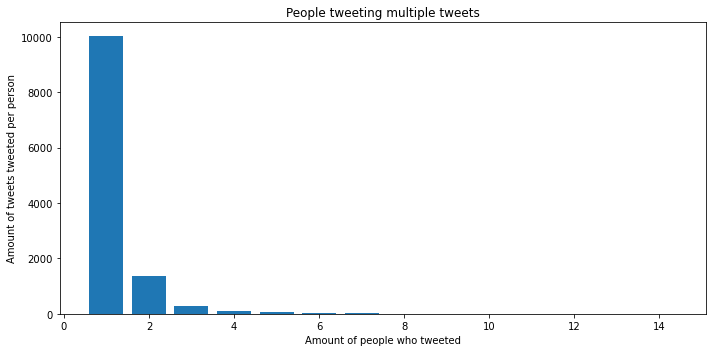

In [93]:
width_2 = 0.35  # the width of the bars

fig_2 = plt.figure(figsize = (10, 5))
plt.bar(w, q)
#plt.set_xtickslabels(x)
plt.xlabel("Amount of people who tweeted")
plt.ylabel("Amount of tweets tweeted per person")
plt.title("People tweeting multiple tweets")
plt.tight_layout()
#plt.set_xticks(x)
plt.show();

#graph with outlier removed

In [94]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def data_cleaner(doc):
    """A function to strip punctuation, strip stopwords, casefold, lemmatize,
    And part pf speech tag words for clean data for modeling"""
    
    sw = stopwords.words('english')
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    #print (type(doc))
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw]
    #print(doc)
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    #print(doc)
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    #print(' '.join(doc))
    return ' '.join(doc)

In [95]:
%%time

c_list = df.text.tolist()

clean_corpus = []
for doc in c_list:
    clean_corpus.append(data_cleaner(doc))

TypeError: expected string or bytes-like object

In [96]:
textlist = df.text.tolist()
len(textlist)

14702

In [97]:
textlist = df.text.tolist()
strlist = []
fltlist = []
indexlist = []
for i in range (0, len(textlist)):
    if type(textlist[i]) == str:
        strlist.append(textlist[i])
    else:
        print (textlist[i])
        print(i)
        indexlist.append(i)
        fltlist.append(textlist[i])
len(strlist), len(fltlist), len(textlist)
indexlist

nan
5006
nan
12884
nan
12921


[5006, 12884, 12921]

In [98]:
df.iloc[5006]

date         2020-03-16 04:06:37
username                DJ_Ajaxx
replies                        0
retweets                       0
favorites                      1
text                         NaN
mentions                     NaN
hashtags                     NaN
id                    1.2394e+18
Name: 29, dtype: object

In [99]:
df.iloc[12884]

date         2020-03-20 21:58:09
username                 AntMob7
replies                        0
retweets                       0
favorites                      1
text                         NaN
mentions                     NaN
hashtags                     NaN
id                   1.24112e+18
Name: 3, dtype: object

In [100]:
df.iloc[12921]

date         2020-03-20 02:03:21
username                 JONGOD_
replies                        0
retweets                       0
favorites                      0
text                         NaN
mentions                     NaN
hashtags                     NaN
id                   1.24082e+18
Name: 41, dtype: object

In [101]:
df.head()

,date,username,replies,retweets,favorites,text,mentions,hashtags,id
0,3/14/2020 23:55,AlbertoxVazquez,0,1,5,Bout to depression buy these OnlyFans while I’...,NaN,NaN,1.238980e+18
2,3/14/2020 23:45,megmarie5,0,0,0,@ariana2525 I myself suffered & still suffer. ...,@ariana2525,NaN,1.238970e+18
3,3/14/2020 23:43,BoozyBillsBabe,13,0,39,Second full day of self-quarantine and I am ju...,NaN,NaN,1.238970e+18
4,3/14/2020 23:42,megmarie5,0,0,1,I’m behind on @VanderpumpRules and binge watch...,@VanderpumpRules @ariana2525,NaN,1.238970e+18
5,3/14/2020 23:37,PostpartumW,0,1,3,Postpartum depression and anxiety can occur wi...,NaN,NaN,1.238970e+18


In [102]:
dftext = df[['username', 'text']]

In [103]:
dftext = dftext.dropna()

In [104]:
dftext.iloc[12919]

username                     mhmmrocio
text        SHANNON you are so bipolar
Name: 42, dtype: object

In [105]:
newlist =  dftext.text.tolist()

In [106]:
len(newlist)

14699

In [107]:
%%time

c_list = dftext.text.tolist()

clean_corpus = []
for doc in c_list:
    clean_corpus.append(data_cleaner(doc))

Wall time: 31.4 s


In [108]:
dftext['clean'] = clean_corpus
dftext.head()

,username,text,clean
0,AlbertoxVazquez,Bout to depression buy these OnlyFans while I’...,bout depression buy onlyfans i’m quarantine
2,megmarie5,@ariana2525 I myself suffered & still suffer. ...,ariana suffer still suffer wish could say it’s...
3,BoozyBillsBabe,Second full day of self-quarantine and I am ju...,second full day self quarantine absolute wreck...
4,megmarie5,I’m behind on @VanderpumpRules and binge watch...,i’m behind vanderpumprules binge watch i’m tha...
5,PostpartumW,Postpartum depression and anxiety can occur wi...,postpartum depression anxiety occur without wa...


In [109]:
dftext['anxiety'] = dftext.clean.str.contains('anxiety')

In [110]:
dftext.head()

,username,text,clean,anxiety
0,AlbertoxVazquez,Bout to depression buy these OnlyFans while I’...,bout depression buy onlyfans i’m quarantine,False
2,megmarie5,@ariana2525 I myself suffered & still suffer. ...,ariana suffer still suffer wish could say it’s...,False
3,BoozyBillsBabe,Second full day of self-quarantine and I am ju...,second full day self quarantine absolute wreck...,True
4,megmarie5,I’m behind on @VanderpumpRules and binge watch...,i’m behind vanderpumprules binge watch i’m tha...,False
5,PostpartumW,Postpartum depression and anxiety can occur wi...,postpartum depression anxiety occur without wa...,True


In [111]:
dftext['depression'] = dftext.clean.str.contains('depression')

In [112]:
dftext.head()

,username,text,clean,anxiety,depression
0,AlbertoxVazquez,Bout to depression buy these OnlyFans while I’...,bout depression buy onlyfans i’m quarantine,False,True
2,megmarie5,@ariana2525 I myself suffered & still suffer. ...,ariana suffer still suffer wish could say it’s...,False,True
3,BoozyBillsBabe,Second full day of self-quarantine and I am ju...,second full day self quarantine absolute wreck...,True,True
4,megmarie5,I’m behind on @VanderpumpRules and binge watch...,i’m behind vanderpumprules binge watch i’m tha...,False,True
5,PostpartumW,Postpartum depression and anxiety can occur wi...,postpartum depression anxiety occur without wa...,True,True


In [113]:
dftext['grade'] = np.where(dftext['anxiety'] != True, 0, 1)

In [114]:
dftext.head()

,username,text,clean,anxiety,depression,grade
0,AlbertoxVazquez,Bout to depression buy these OnlyFans while I’...,bout depression buy onlyfans i’m quarantine,False,True,0
2,megmarie5,@ariana2525 I myself suffered & still suffer. ...,ariana suffer still suffer wish could say it’s...,False,True,0
3,BoozyBillsBabe,Second full day of self-quarantine and I am ju...,second full day self quarantine absolute wreck...,True,True,1
4,megmarie5,I’m behind on @VanderpumpRules and binge watch...,i’m behind vanderpumprules binge watch i’m tha...,False,True,0
5,PostpartumW,Postpartum depression and anxiety can occur wi...,postpartum depression anxiety occur without wa...,True,True,1


In [115]:
conditions = [
    (dftext['anxiety'] == True) & (dftext['depression'] == False), #0 anxiety
    (dftext['depression'] == True) & (dftext['anxiety'] == False),  #1 depression
    (dftext['anxiety'] == True) & (dftext['depression'] == True), #2 anxiety and depression
    (dftext['anxiety'] == False) & (dftext['depression'] == False) #3 neither anxiety nor depression
]
vals = [0,1,2,3]
dftext['grade'] = np.select(conditions, vals)

In [116]:
dist  = list(dftext.grade.value_counts())
dist
x = [0,3,1,2]
dist

[7352, 3211, 3167, 969]

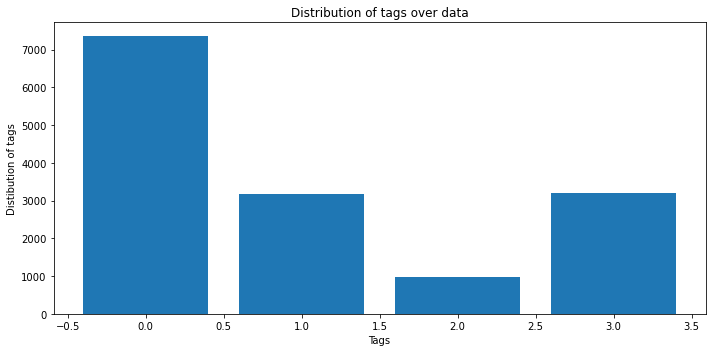

In [117]:
width_3 = 0.35  # the width of the bars

fig_3 = plt.figure(figsize = (10, 5))
#plt.bar([0,3,1,2], [7352, 3211, 3167, 969])
plt.bar(x, dist)
#plt.set_xtickslabels(x)
plt.xlabel("Tags")
plt.ylabel("Distibution of tags")
plt.title("Distribution of tags over data")
plt.tight_layout()
#plt.set_xticks(x)
plt.show();

In [118]:
dftext = dftext[dftext.grade != 2]

In [119]:
dftext.grade.value_counts()

0    7352
3    3211
1    3167
Name: grade, dtype: int64

In [120]:
data = dftext['clean']
target = dftext['grade']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    random_state=42,
                                                    test_size=0.25)

In [122]:

X_t, X_val, y_t, y_val = train_test_split(X_train, y_train,
                                          test_size=0.25, random_state=42)

In [123]:
vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range=(1,2))
#calculate the TF-IDF score for unigrams and bigrams in text

X_t_vec = vectorizer.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(vectorizer.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

In [124]:
X_val_vec = vectorizer.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(vectorizer.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

In [125]:
X_t_vec

,aaaabhhhhhbbhhhhhghhfhhh,aab,aacnursing,aacnursing aanp,aaets,aaets org,aai,aai rnrbau,aan,aan time,...,zxn,zy,zygvzdr,zygvzdr db,zywz,zywz krispy,zz,zzpa,zzzz,zzzz downtownrungroup
567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
%%time

sgd = SGDClassifier()
sgd.fit(X_t_vec, y_t)
sgd_pred = sgd.predict(X_val_vec)
#sgd.score(X_train, y_train), sgd.score(X_test, y_test)
sgd_acc = accuracy_score(y_val, sgd_pred)
sgd_acc

#conf_matrix_plotter(sgd, X_t_vec, y_t)

Wall time: 4.84 s


0.9902912621359223

In [127]:

lr = LogisticRegression()
mnb = MultinomialNB()
bnb = BernoulliNB()
knn =  KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgb = XGBClassifier()
sgd = SGDClassifier()

In [128]:

##Logistic Regression Hyperparameters
lr_params = {
   'lr__C':[.1, .75],
   'lr__max_iter':[500],
   'lr__solver':['lbfgs', 'liblinear']
    
            }

##Multinomial Naive Bayes
mnb_params = {    
    'mnb__alpha': [1, .5, .1],
    'mnb__fit_prior': ['True', 'False']
}

##Bernoulli Naive Bayes Hyperparameters
bnb_params = {'bnb__alpha': list(np.linspace(.1, 1, 10))}

##K Nearest Neighbors
knn_params = {
    'knn__n_neighbors': [3, 7, 12], 
    'knn__weights':['uniform', 'distance'], 
    'knn__p':[1, 2, 3, 4]
             }

##Decision Tree
dtc_params = {
    'dtc__criterion':['gini', 'entropy'],  
    'dtc__max_depth': [10, 25, 40, 55],
    'dtc__min_samples_leaf':[1, 2, 3], 
    'dtc__max_features': ['auto', 'sqrt']
              } 

##Random Forest
rfc_params = {
    'rfc__n_estimators':[100, 125],
    'rfc__criterion':['gini', 'entropy'],
    'rfc__max_depth':[20, 40, None],
    'rfc__min_samples_leaf':[1, 2, 3], 
    'rfc__max_features': ['auto','sqrt', 'log2']
                }

##XGBoost
xgb_params = {
        'xgb__eta':[.7, .9, 1.1],
        'xgb__max_depth': [6, 10, 15, 20],
        'xgb__learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'xgb__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'xgb__colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'xgb__colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'xgb__min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'xgb__gamma': [0, 0.25, 0.5, 1.0],
        'xgb__reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'xgb__n_estimators': [100, 120]
            }

##SGD Params
sgd_params ={
    'sgd__loss': ['hinge', 'log', 'modified_huber', 'perceptron', 'huber', 'squared_loss'],
    'sgd__penalty': ['l2', 'l1', 'elasticnet'],
    'sgd__alpha': [0.0001, 0.001, 0.01, 0.1],    
}

In [129]:
lr_pipe = Pipeline(steps =[('tf', TfidfVectorizer()),('lr', LogisticRegression())])
mnb_pipe = Pipeline(steps =[('tf', TfidfVectorizer()),('mnb', MultinomialNB())])
bnb_pipe = Pipeline(steps =[('tf', TfidfVectorizer()),('bnb', BernoulliNB())])
knn_pipe = Pipeline(steps =[('tf', TfidfVectorizer()),('knn', KNeighborsClassifier())])
dtc_pipe = Pipeline(steps =[('tf', TfidfVectorizer()),('dtc', DecisionTreeClassifier())])
rfc_pipe = Pipeline(steps =[('tf', TfidfVectorizer()),('rfc', RandomForestClassifier())])
xgb_pipe = Pipeline(steps =[('tf', TfidfVectorizer()),('xgb', XGBClassifier())])
sgd_pipe = Pipeline(steps =[('tf', TfidfVectorizer()),('sgd', SGDClassifier())])
#creating  pipelines for each models

In [130]:
log_grid = GridSearchCV(estimator = lr_pipe, param_grid = lr_params, scoring = 'accuracy')
log_grid.fit(X_train, y_train)
log_grid.best_params_


{'lr__C': 0.75, 'lr__max_iter': 500, 'lr__solver': 'lbfgs'}

In [131]:
mnb_grid = GridSearchCV(estimator = mnb_pipe, param_grid = mnb_params, scoring = 'accuracy')
mnb_grid.fit(X_train, y_train)
mnb_grid.best_params_

{'mnb__alpha': 0.1, 'mnb__fit_prior': 'True'}

In [132]:

bnb_grid = GridSearchCV(estimator = bnb_pipe, param_grid = bnb_params, scoring = 'accuracy')
bnb_grid.fit(X_train, y_train)
bnb_grid.best_params_

{'bnb__alpha': 0.4}

In [133]:
knn_grid = GridSearchCV(estimator = knn_pipe, param_grid = knn_params, scoring = 'accuracy')
knn_grid.fit(X_train, y_train)
knn_grid.best_params_

C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for sparse input. Use sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute']) to g

C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for sparse input. Use sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute']) to g

C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for sparse input. Use sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute']) to g

C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for sparse input. Use sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute']) to g

C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for sparse input. Use sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute']) to g

C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for sparse input. Use sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute']) to g

C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for sparse input. Use sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute']) to g

C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 419, in _fit
    raise ValueError("Metric '%s' not valid for sparse input. "
ValueError: Metric 'minkowski' not valid for sparse input. Use sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute']) to g

{'knn__n_neighbors': 12, 'knn__p': 1, 'knn__weights': 'distance'}

In [136]:
sgd_grid = GridSearchCV(estimator = sgd_pipe, param_grid = sgd_params, scoring = 'accuracy')
sgd_grid.fit(X_train, y_train)
sgd_grid.best_params_

C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


{'sgd__alpha': 0.0001, 'sgd__loss': 'perceptron', 'sgd__penalty': 'elasticnet'}

In [137]:
sgd_pipe_tuned = Pipeline(steps =[('tf', TfidfVectorizer()),
                                  ('sgd', SGDClassifier(alpha = 0.0001, loss = 'perceptron', penalty = 'elasticnet'))])

In [138]:
sgd_pipe_tuned.fit(X_train, y_train);
#plot_confusion_matrix(sgd_pipe_tuned, X_train, y_train);
print("Mean Accuracy:", cross_val_score(sgd_pipe_tuned, X_train, y_train).mean())

Mean Accuracy: 0.9998057309373483


Mean Accuracy: 0.9962120344082737


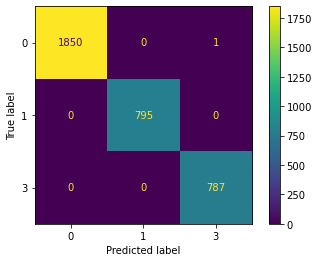

In [141]:
sgd_pipe_tuned.fit(X_train, y_train)

test_preds = sgd_pipe_tuned.predict(X_test)
sgd_acc = accuracy_score(y_test, test_preds)

plot_confusion_matrix(sgd_pipe_tuned, X_test, y_test);
print("Mean Accuracy:", cross_val_score(sgd_pipe_tuned, X_test, y_test).mean())

In [140]:
def conf_matrix_plotter(model, X_t_vec, y_t):
    """create confusion matrix plots"""
    fig, ax = plt.subplots()

    fig.suptitle(str(model))

    plot_confusion_matrix(model, X_t_vec, y_t, ax=ax, cmap="plasma");

In [145]:
tp = 1850
tn = 0+795 +0 +787
fp = 0+1
fn = 0+0

prec = tp/(tp +fp)
recall = tp/(tp + fn)
fscore = (100 - (prec+recall)) 

In [146]:
prec, recall, fscore

(0.9994597514856834, 1.0, 98.00054024851431)

In [147]:
def feature_finder(model):
    """Takes in a model and pulls out the most relevant 5000 features
        and their coefficients. Returns a dataframe of features and coefficients"""
    
    features = model.steps[0][1].get_feature_names()
    feat_values = model[1].coef_

    c = {'features' : features}
    feats = pd.DataFrame(data = c)
    feats['values'] = feat_values[0]

    sorted_feats = feats.sort_values(by='values')
    return  sorted_feats

In [148]:
sorted_feats = feature_finder(sgd_pipe_tuned)

In [149]:
sorted_feats.head(20)

,features,values
3671,depression,-0.559727
1451,bipolar,-0.132203
648,anxious,-0.108408
3672,depressive,-0.035938
11676,proceeds,0.000000
11651,priority,0.000000
11652,prir,0.000000
11653,priscillatotiya,0.000000
11654,prison,0.000000
11655,prisoner,0.000000


In [150]:
sorted_feats.tail(20)

,features,values
5831,georgehwbush,0.000000
7425,intention,0.001817
15002,thing,0.006355
16152,vibe,0.010482
13744,smile,0.012512
2975,coronanxiety,0.013975
12218,re,0.014910
516,amped,0.015434
9464,mind,0.016801
7427,intentionally,0.017934


In [ ]:
f                                                                                                                                                                                                  